In [1]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [21]:
#애저에서 받은 키와 url

subscription_key = '0b418abfb3594f77bc4dbb2f0276aae8'
face_api_url = 'https://labuser30face.cognitiveservices.azure.com/face/v1.0/detect'


#Class, library, Package 대문자 관례
#지역변수, 파라메타 소문자로 사용
#addr, msg 줄임말 배제
#두 단어가 합쳐지면 두 번째 단어는 대문자
#상수는 전체가 대문자

#심한 곳은 변수명 조차도 컴파일 단계에서 버그로 잡힌다.

image_url = 'http://ccimg.hellomarket.com/images/2021/item/12/09/16/0324242_5428633_1.jpg?size=s6'

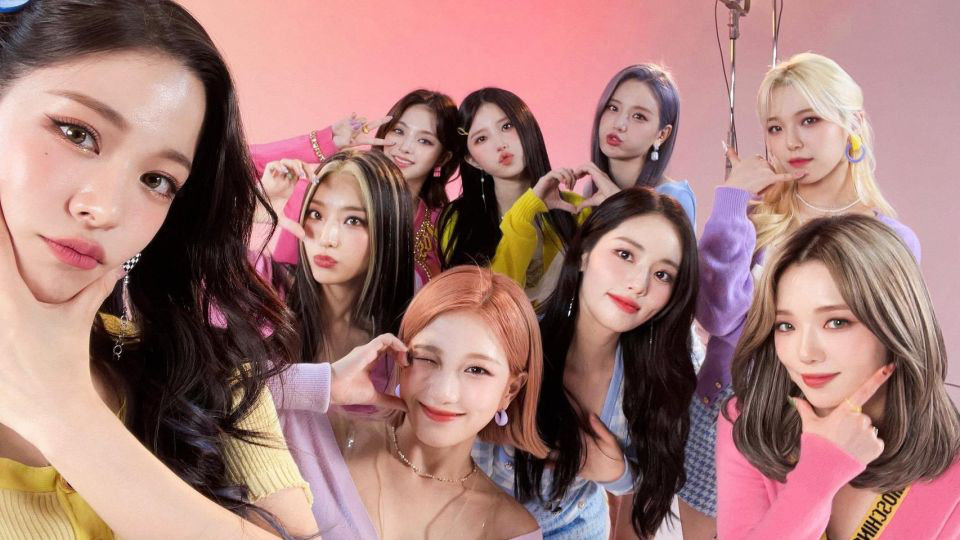

In [22]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [23]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'Smile'
}
# returnFaceID              <- 얼굴을 구분할 수 있게 아이디를 부여받는다.
# returnFaceLandmarks       <- 눈코입 주요지점 랜드마크 정보 
# returnFaceAttributes      <- 나이와 성별을 받겠다.
data = {'url': image_url}

In [24]:
response = requests.post(face_api_url, params=params, headers=headers,json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 99, 'left': 0, 'width': 204, 'height': 211},
  'faceAttributes': {'smile': 0.001}},
 {'faceRectangle': {'top': 293, 'left': 758, 'width': 110, 'height': 110},
  'faceAttributes': {'smile': 0.693}},
 {'faceRectangle': {'top': 333, 'left': 393, 'width': 107, 'height': 107},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 236, 'left': 587, 'width': 94, 'height': 94},
  'faceAttributes': {'smile': 0.605}},
 {'faceRectangle': {'top': 195, 'left': 287, 'width': 86, 'height': 86},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 104, 'left': 759, 'width': 74, 'height': 74},
  'faceAttributes': {'smile': 0.003}},
 {'faceRectangle': {'top': 115, 'left': 470, 'width': 60, 'height': 60},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 96, 'left': 592, 'width': 58, 'height': 58},
  'faceAttributes': {'smile': 0.001}},
 {'faceRectangle': {'top': 120, 'left': 380, 'width': 56, 'height': 56},
  'faceAttributes': {'smile': 0.999

In [25]:
draw = ImageDraw.Draw(image)

In [26]:
def DrawBox(faces):

  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width  = rect['width']
    height = rect['height']

    draw.rectangle(((left, top), (left + width, top + height)), outline = 'red')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((left, top), str(smile), fill = 'red')

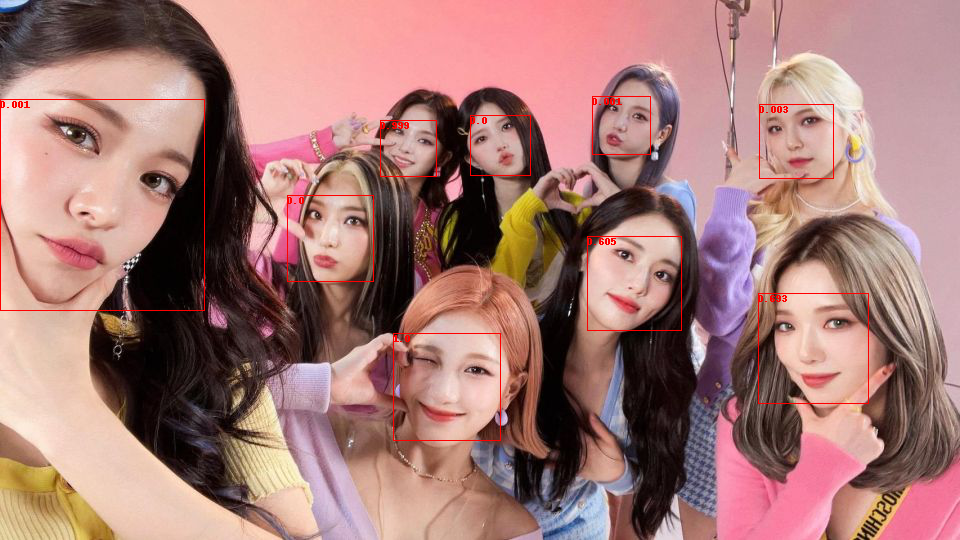

In [27]:
DrawBox(faces)
image